# Исследование надёжности заёмщиков

## Описание проекта

Заказчик — кредитный отдел банка. **Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок**.Входные данные от банка — статистика о платёжеспособности клиентов.\
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Описание данных

- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита

## Оглавление

## 1. Знакомство с данными

In [322]:
import pandas as pd
import seaborn as sb

In [323]:
data = pd.read_csv('data.csv')
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [324]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Выводы**
- В таблице имеются пропуски в столбцах `days_employed` и `total_income`, при том в одной строке. Поэтому можно предположить, что эти пропуски не случайные. Например, заемщик не предоставил справку 2-НДФЛ или имеются проблемы при ее загрузке в систему банка.
- В столбце `days_employed` - стаж в днях - все значения не целые, a так же присутсвуют отрицательные значения
- В столбцах `education` и `purpose` присутствуют неявные дубликаты

## 2. Предобработка данных

### Удаление пропусков

В двух столбцах есть пропущенные значения. Со столбцом `days_employed` разберемся на этапе обработки аномальных значений. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Заполнение пропусков медианным значение - оптимальное решение для столбцов с зарплатой и опытом работы, так как разброс в данных слишком большой и присутсвтуют выбросы. Среднее не даст объективной оценки.

In [325]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Столбец `days_employed`**

Заменим все отрицательные значения в столбце `days_employed` положительными с помощью метода `abs()`.

In [326]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.

In [327]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования. Теперь можно заполнить пропуски медианными значениями для каждого типа занятости `income_type`.

In [328]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Убедимся, что все пропуски заполнены

In [329]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**Столбец `children`**

In [330]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце children есть два аномальных значения (-1, 20). Удалим строки, в которых встречаются такие аномальные значения

In [331]:
data = data[(data['children'] != -1) & (data['children'] != 20)]
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

**Столбец `gender`**

In [332]:
data['gender'].value_counts()

F      14154
M       7247
XNA        1
Name: gender, dtype: int64

Значение XNA является артефактом. Выделять эту единственную строку в отдельную категорию будет не корректно, поэтому избавимся от нее

In [333]:
data = data[data['gender'] != 'XNA']
data['gender'].unique()

array(['F', 'M'], dtype=object)

**Столбец `dob_years`**

In [334]:
data['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75], dtype=int64)

Подозрение вызывает значение 0. Таким образом скорее всего были заполнены пропуски в данном столбце. Заполним их медианными значениями для каждого типа занятости `income_type`, так как в зависимоти от того пенсионер это или студент и стоит рассчитывать средний возраст.

In [335]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['dob_years'] == 0), 'dob_years'] = \
    data.loc[(data['income_type'] == t), 'dob_years'].mean()

In [336]:
data['dob_years'] = data['dob_years'].astype('int') # вернем столбец к типу int
data['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51, 59, 29, 60, 55, 58, 71, 22, 73, 66,
       69, 19, 72, 70, 74, 75])

### Изменение типов данных

Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`

In [337]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

Обработаем неявные дубликаты в столбце education. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру. Проверим остальные столбцы.

In [338]:
data['education'] = data['education'].str.lower() # приведение к нижнему регистру

In [339]:
data.duplicated().sum()

71

После изменения регистра в датафрэйме присутсвует 71 строка дубликатов. Избавимся от них

In [340]:
data = data.drop_duplicates()

### Категоризация данных

На основании диапазонов, указанных ниже, создадим в датафрейме столбец `total_income_category` с категориями:
- до 50000 — 'D';
- 50001–100000 — 'C';
- 100001–150000 — 'B';
- 150001 и выше — 'A'.

In [341]:
def categorize_income(income):
    try:
        if 0 <= income <= 50000:
            return 'E'
        elif 50001 <= income <= 100000:
            return 'D'
        elif 100001 <= income <= 150000:
            return 'C'
        elif 150001 <= income <= 250000:
            return 'B'
        elif income >= 250001:
            return 'A'
    except:
        pass

In [342]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Выведим на экран перечень уникальных целей взятия кредита из столбца `purpose`.

In [343]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

- 'операции с автомобилем',
- 'операции с недвижимостью',
- 'проведение свадьбы',
- 'получение образования'.

In [344]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [345]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

**В результате предобработки:**
- избавились от аномальных значений в столбцах `days_employed`, `children` и `gender`,
- заполнены пропуски в столбцах `days_employed` и `total_income` медианным значением по каждому типу из столбца `income_type`,
- заполнены нули в столбцах `dob_days` средним значением по каждому типу из столбца `income_type`,
- изменен вещественный тип данных в столбце `total_income` на целочисленный,
- удалены дубликаты в столбце `education`,
- добавлены новые с толбцы с категориями на основании столбцов `total_income` и `purpose`.

## 3. Исследовательский анализ данных

**Есть ли зависимость между количеством детей и возвратом кредита в срок?**

In [346]:
data['children'].value_counts()

0    14090
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

Больше половины выборки - бездетные. А количество тех, кто имеет 3, 4 и 5 детей и вовсе меньше 2% от всей выборки, что не сопостовимо мало, поэтому анализ каждой из них поотдельности не принесет достоверных результатов. Поэтому целесообразнее разбить на группы: бездетные, один ребенок и многодетные.

In [347]:
def categorize_children(c): # функция которая присвоит категорию в зависимости от количества детей
    if c == 0:
        return 'бездетный'
    if c == 1:
        return 'один ребенок'
    return 'многодетные'

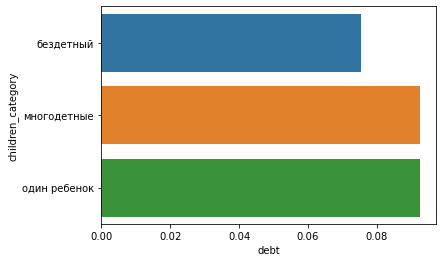

In [348]:
data['children_category'] = data['children'].apply(categorize_children) #добавим новый столбец с категорией
debt_by_children = data.groupby('children_category')['debt'].mean()#считаем долю не вернувших кредит в срок по группам
sb.barplot(x=debt_by_children, y=debt_by_children.keys());#строим по полученным данным диаграмму

**Вывод:** Зависимость между количеством детей и возврата кредита в срок не прослеживается. Но очевидна зависимость между наличием детей и возвратом кредита в срок: бездетные реже имеют просрочки по кредиту.

**Есть ли зависимость между семейным положением и возвратом кредита в срок?**

In [349]:
data['family_status'].value_counts()

женат / замужем          12261
гражданский брак          4133
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
Name: family_status, dtype: int64

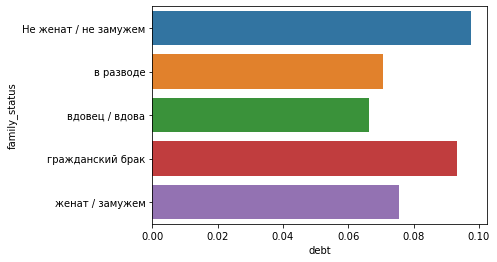

In [350]:
debt_by_family_st = data.groupby('family_status')['debt'].mean() #считаем долю задолжников в группах по семейному положению
sb.barplot(x=debt_by_family_st, y=debt_by_family_st.keys()); #строим по полученным данным диаграмму

**Вывод:** По графику можно заметить, что задолжники чаще встречаются среди тех, кто не состоит\не состоял в официальном браке, т.е. не женат/не замужем или состоят в гражданском браке (больше 9% имеют задолженности по кредиту). Есть предположение, что наиболее надежные заемщики вдовцы\вдовы, но возможно это свзяно с тем что статистики по ним меньше чем по всемостальным группам. Утверждать, что есть зависимость между семейным положением и возвратом кредита в срок нельзя. 

**Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

In [351]:
data['total_income_category'].value_counts()

C    7110
B    6979
D    4073
A    2797
E     371
Name: total_income_category, dtype: int64

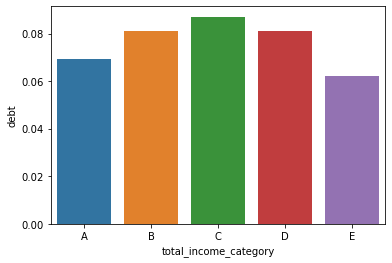

In [352]:
debt_by_total_income = data.groupby('total_income_category')['debt'].mean() #считаем долю задолжников в группах по доходу
sb.barplot(x=debt_by_total_income.keys(), y=debt_by_total_income); # строим диаграмму

**Вывод:** Зависимости между уровнем дохода и возвратом кредита в срок нет. Наиболее надажные заемщики (как ни странно) с доходом менее 50 тыс.р. Самый высокий процент (почти 9%) должников в группе с доходом 100 - 150 тыс.р.

**Как разные цели кредита влияют на его возврат в срок?**

In [353]:
data['purpose_category'].value_counts()

операции с недвижимостью    10750
операции с автомобилем       4279
получение образования        3988
проведение свадьбы           2313
Name: purpose_category, dtype: int64

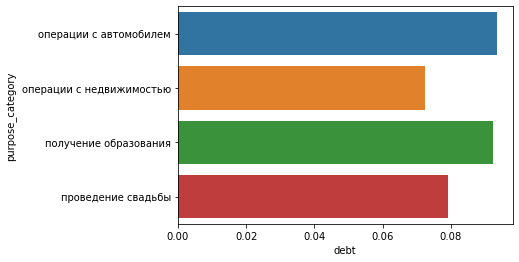

In [354]:
debt_by_purpose_category = data.groupby('purpose_category')['debt'].mean() #считаем долю задолжников в группах по целям
sb.barplot(x=debt_by_purpose_category, y=debt_by_purpose_category.keys()); # строим диаграмму

**Вывод:** Задолжники чаще встречаются среди тех кто взял кредит на автомобиль или обучение.

**Как возраст заемщика влияет на его возврат в срок?**

Разобьем всех заемщиков на группы по возрасту:
- до 35 лет
- от 35 до 50
- от 50

In [355]:
def years_categorize(years): 
    if years <= 35:
        return 'до 35'
    if 36 <= years <= 50:
        return 'от 35 до 50'
    return 'старше 50'

In [356]:
data['years_category'] = data['dob_years'].apply(years_categorize)

In [357]:
data['years_category'].value_counts()

от 35 до 50    8153
старше 50      6634
до 35          6543
Name: years_category, dtype: int64

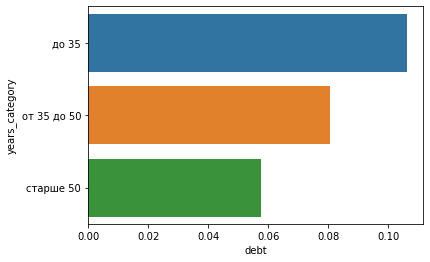

In [358]:
debt_by_years = data.groupby('years_category')['debt'].mean() 
sb.barplot(x=debt_by_years, y=debt_by_years.keys()); # строим диаграмму

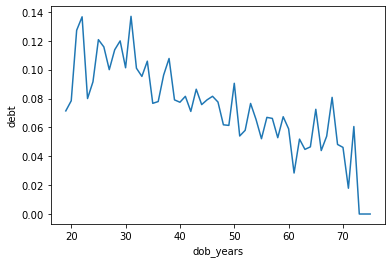

In [359]:
debt = data.groupby('dob_years')['debt'].mean()
sb.lineplot(data=debt);

Нисходящая тенденция оцевидна. Прослеживается четкая зависимость чем старше человек, тем ниже вероятность того, что у него будут просрочки по кредиту.

**Вывод:** Присутсвует зависимость между возрастом заемщика и возвратом кредита в срок. Чем младше человек, тем выше вероятность, что он не вернет кредит в срок.

Теперь посмотрим какой процент задолжников в группах сразу по двум критериям, которые как установлено влияют на возврат кредита в срок - возраст и цель.

In [360]:
data.groupby(['years_category', 'purpose_category'])\
.agg({'debt':['mean', 'count']}).reset_index().sort_values(by=('debt','mean'), ascending=False)[:10]

years_category          purpose_category      debt      
                                                 mean count
2           до 35     получение образования  0.128351  1231
0           до 35    операции с автомобилем  0.126860  1277
1           до 35  операции с недвижимостью  0.093297  3312
4     от 35 до 50    операции с автомобилем  0.091296  1643
3           до 35        проведение свадьбы  0.091286   723
6     от 35 до 50     получение образования  0.086635  1489
7     от 35 до 50        проведение свадьбы  0.086108   871
5     от 35 до 50  операции с недвижимостью  0.072771  4150
8       старше 50    операции с автомобилем  0.064753  1359
10      старше 50     получение образования  0.064669  1268

**Вывод:** Вот тут четко прослеживается, что самый восокий процент должников среди молодых людей, которые берут кредит на автомобиль и образование. Каждый восьмой имеет задолженность по кредиту.

## 4. Общий вывод

В процессе анализа было исследовано влияние следующих критериев на возврат кредита в срок:
- **Количество детей**. Зависимость между количеством детей и возврата кредита в срок не прослеживается. Но очевидна зависимость между наличием детей и возвратом кредита в срок: бездетные реже имеют просрочки по кредиту.
- **Семейное положение**. Задолжники чаще встречаются среди тех, кто не состоит\не состоял в официальном браке, т.е. не женат/не замужем или состоят в гражданском браке (больше 9% имеют задолженности по кредиту). Есть предположение, что наиболее надежные заемщики вдовцы\вдовы, но возможно это свзяно с тем что статистики по ним меньше чем по всемостальным группам. Утверждать, что есть зависимость между семейным положением и возвратом кредита в срок нельзя. 
- **Уровень дохода**. Зависимости между уровнем дохода и возвратом кредита в срок не выявлено. Наиболее надажные заемщики (как ни странно) с доходом менее 50 тыс.р. Самый высокий процент (почти 9%) должников в группе с доходом 100 - 150 тыс.р.
- **Цель кредита**. Задолжники чаще встречаются среди тех кто взял кредит на автомобиль или обучение.
- **Возраст заемщика**. Присутсвует зависимость между возрастом заемщика и возвратом кредита в срок. Чем младше человек, тем выше вероятность, что он не вернет кредит в срок.

**Группа риска - молодые люди , которые берут кредит на автомобиль или оброзование.**